# Praca domowa nr 2

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("allegro-api-transactions.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420020 entries, 0 to 420019
Data columns (total 14 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   lp                      420020 non-null  int64  
 1   date                    420020 non-null  object 
 2   item_id                 420020 non-null  int64  
 3   categories              420020 non-null  object 
 4   pay_option_on_delivery  420020 non-null  int64  
 5   pay_option_transfer     420020 non-null  int64  
 6   seller                  420020 non-null  object 
 7   price                   420020 non-null  float64
 8   it_is_allegro_standard  420020 non-null  int64  
 9   it_quantity             420020 non-null  int64  
 10  it_is_brand_zone        420020 non-null  int64  
 11  it_seller_rating        420020 non-null  int64  
 12  it_location             420020 non-null  object 
 13  main_category           420020 non-null  object 
dtypes: float64(1), int64

Na szczęście braku nulli :)

In [4]:
df.head()

,lp,date,item_id,categories,pay_option_on_delivery,pay_option_transfer,seller,price,it_is_allegro_standard,it_quantity,it_is_brand_zone,it_seller_rating,it_location,main_category
0,0,2016-04-03 21:21:08,4753602474,"['Komputery', 'Dyski i napędy', 'Nośniki', 'No...",1,1,radzioch666,59.99,1,997,0,50177,Warszawa,Komputery
1,1,2016-04-03 15:35:26,4773181874,"['Odzież, Obuwie, Dodatki', 'Bielizna damska',...",1,1,InwestycjeNET,4.90,1,9288,0,12428,Warszawa,"Odzież, Obuwie, Dodatki"
2,2,2016-04-03 14:14:31,4781627074,"['Dom i Ogród', 'Budownictwo i Akcesoria', 'Śc...",1,1,otostyl_com,109.90,1,895,0,7389,Leszno,Dom i Ogród
3,3,2016-04-03 19:55:44,4783971474,"['Książki i Komiksy', 'Poradniki i albumy', 'Z...",1,1,Matfel1,18.50,0,971,0,15006,Wola Krzysztoporska,Książki i Komiksy
4,4,2016-04-03 18:05:54,4787908274,"['Odzież, Obuwie, Dodatki', 'Ślub i wesele', '...",1,1,PPHU_RICO,19.90,1,950,0,32975,BIAŁYSTOK,"Odzież, Obuwie, Dodatki"


## Target encoding dla zmiennej it_location

Link do animacji pokazującej zasadę działania target encodingu: https://brendanhasz.github.io/2019/03/04/target-encoding#target-encoding

In [5]:
import category_encoders as ce

dfX = df.copy()
encoder = ce.TargetEncoder(cols = 'it_location')

dfX['it_location'] = encoder.fit_transform(dfX['it_location'], dfX['price'])
dfX.head()

/home/adrian/anaconda3/lib/python3.7/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


,lp,date,item_id,categories,pay_option_on_delivery,pay_option_transfer,seller,price,it_is_allegro_standard,it_quantity,it_is_brand_zone,it_seller_rating,it_location,main_category
0,0,2016-04-03 21:21:08,4753602474,"['Komputery', 'Dyski i napędy', 'Nośniki', 'No...",1,1,radzioch666,59.99,1,997,0,50177,85.423398,Komputery
1,1,2016-04-03 15:35:26,4773181874,"['Odzież, Obuwie, Dodatki', 'Bielizna damska',...",1,1,InwestycjeNET,4.90,1,9288,0,12428,85.423398,"Odzież, Obuwie, Dodatki"
2,2,2016-04-03 14:14:31,4781627074,"['Dom i Ogród', 'Budownictwo i Akcesoria', 'Śc...",1,1,otostyl_com,109.90,1,895,0,7389,61.990914,Dom i Ogród
3,3,2016-04-03 19:55:44,4783971474,"['Książki i Komiksy', 'Poradniki i albumy', 'Z...",1,1,Matfel1,18.50,0,971,0,15006,35.433365,Książki i Komiksy
4,4,2016-04-03 18:05:54,4787908274,"['Odzież, Obuwie, Dodatki', 'Ślub i wesele', '...",1,1,PPHU_RICO,19.90,1,950,0,32975,117.191956,"Odzież, Obuwie, Dodatki"


Zalety: 
* kodowanie nie zwiększa wymiaru ramki danych - w tym przypadku przy zastosowaniu klasycznego One Hot Encoding dostalibyśmy ramkę danych o ponad 10000 kolumnach

Wady:
* zależny od rozkładu tagetu dla danej kategorii
* może być niejednoznaczne - w szczególności w przypadku dużej liczby różnych klas - tak jak w tym przykładzie:

In [6]:
print(f"Liczba unikalnych, pierwotnych wartości it_location: {df.it_location.nunique()}")
print(f"Liczba unikalnych, zakodowanych wartości it_location: {dfX.it_location.nunique()}")

Liczba unikalnych, pierwotnych wartości it_location: 10056
Liczba unikalnych, zakodowanych wartości it_location: 6283


## Encoding dla main_category

### 1. One Hot Encoder

Link do animacji pokazującej zasadę działania one hot encodingu: https://brendanhasz.github.io/2019/03/04/target-encoding#one-hot-encoding

In [7]:
dfX = df.copy()
dfX.head()

,lp,date,item_id,categories,pay_option_on_delivery,pay_option_transfer,seller,price,it_is_allegro_standard,it_quantity,it_is_brand_zone,it_seller_rating,it_location,main_category
0,0,2016-04-03 21:21:08,4753602474,"['Komputery', 'Dyski i napędy', 'Nośniki', 'No...",1,1,radzioch666,59.99,1,997,0,50177,Warszawa,Komputery
1,1,2016-04-03 15:35:26,4773181874,"['Odzież, Obuwie, Dodatki', 'Bielizna damska',...",1,1,InwestycjeNET,4.90,1,9288,0,12428,Warszawa,"Odzież, Obuwie, Dodatki"
2,2,2016-04-03 14:14:31,4781627074,"['Dom i Ogród', 'Budownictwo i Akcesoria', 'Śc...",1,1,otostyl_com,109.90,1,895,0,7389,Leszno,Dom i Ogród
3,3,2016-04-03 19:55:44,4783971474,"['Książki i Komiksy', 'Poradniki i albumy', 'Z...",1,1,Matfel1,18.50,0,971,0,15006,Wola Krzysztoporska,Książki i Komiksy
4,4,2016-04-03 18:05:54,4787908274,"['Odzież, Obuwie, Dodatki', 'Ślub i wesele', '...",1,1,PPHU_RICO,19.90,1,950,0,32975,BIAŁYSTOK,"Odzież, Obuwie, Dodatki"


In [8]:
enc = ce.OneHotEncoder(cols="main_category", use_cat_names=True)
dfX = enc.fit_transform(dfX)

dfX.head()

/home/adrian/anaconda3/lib/python3.7/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


,lp,date,item_id,categories,pay_option_on_delivery,pay_option_transfer,seller,price,it_is_allegro_standard,it_quantity,...,main_category_Filmy,main_category_Fotografia,main_category_Biuro i Reklama,main_category_Instrumenty,main_category_Muzyka,main_category_Konsole i automaty,"main_category_Sprzęt estradowy, studyjny i DJ-ski",main_category_Antyki i Sztuka,main_category_Bilety,main_category_Nieruchomości
0,0,2016-04-03 21:21:08,4753602474,"['Komputery', 'Dyski i napędy', 'Nośniki', 'No...",1,1,radzioch666,59.99,1,997,...,0,0,0,0,0,0,0,0,0,0
1,1,2016-04-03 15:35:26,4773181874,"['Odzież, Obuwie, Dodatki', 'Bielizna damska',...",1,1,InwestycjeNET,4.90,1,9288,...,0,0,0,0,0,0,0,0,0,0
2,2,2016-04-03 14:14:31,4781627074,"['Dom i Ogród', 'Budownictwo i Akcesoria', 'Śc...",1,1,otostyl_com,109.90,1,895,...,0,0,0,0,0,0,0,0,0,0
3,3,2016-04-03 19:55:44,4783971474,"['Książki i Komiksy', 'Poradniki i albumy', 'Z...",1,1,Matfel1,18.50,0,971,...,0,0,0,0,0,0,0,0,0,0
4,4,2016-04-03 18:05:54,4787908274,"['Odzież, Obuwie, Dodatki', 'Ślub i wesele', '...",1,1,PPHU_RICO,19.90,1,950,...,0,0,0,0,0,0,0,0,0,0


### 1a. MultiLabelBinarizer

W tym zbiorze danych w kolumnie main_category mamy czasami kilka kategorii odzielonych przecinkami; dobrze by było, aby te produkty były zapisane jako elementy poszczególnych kategorii, a nie tylko jako element jednej zgrupowanej kategorii.

In [9]:
categories = {}
dfX = df.copy()

def split_and_count(x, categories):
    cat_list = x.split(',')
    for cat in cat_list:
        categories.setdefault(cat, 0)
        categories[cat] += 1
    return categories

for row in dfX['main_category'].iteritems():
    split_and_count(row[1], categories)
    
categories_df = pd.DataFrame.from_dict(categories, orient='index').reset_index()
categories_df.columns = ['category', 'count']
categories_df.sort_values(by='count', ascending=False)
categories_df.head()

,category,count
0,Komputery,14491
1,Odzież,54257
2,Obuwie,54257
3,Dodatki,54257
4,Dom i Ogród,91042


In [10]:
dfX['main_category'] = dfX.main_category.str.split(',')

dfX.head()

,lp,date,item_id,categories,pay_option_on_delivery,pay_option_transfer,seller,price,it_is_allegro_standard,it_quantity,it_is_brand_zone,it_seller_rating,it_location,main_category
0,0,2016-04-03 21:21:08,4753602474,"['Komputery', 'Dyski i napędy', 'Nośniki', 'No...",1,1,radzioch666,59.99,1,997,0,50177,Warszawa,[Komputery]
1,1,2016-04-03 15:35:26,4773181874,"['Odzież, Obuwie, Dodatki', 'Bielizna damska',...",1,1,InwestycjeNET,4.90,1,9288,0,12428,Warszawa,"[Odzież, Obuwie, Dodatki]"
2,2,2016-04-03 14:14:31,4781627074,"['Dom i Ogród', 'Budownictwo i Akcesoria', 'Śc...",1,1,otostyl_com,109.90,1,895,0,7389,Leszno,[Dom i Ogród]
3,3,2016-04-03 19:55:44,4783971474,"['Książki i Komiksy', 'Poradniki i albumy', 'Z...",1,1,Matfel1,18.50,0,971,0,15006,Wola Krzysztoporska,[Książki i Komiksy]
4,4,2016-04-03 18:05:54,4787908274,"['Odzież, Obuwie, Dodatki', 'Ślub i wesele', '...",1,1,PPHU_RICO,19.90,1,950,0,32975,BIAŁYSTOK,"[Odzież, Obuwie, Dodatki]"


In [11]:
from sklearn.preprocessing import MultiLabelBinarizer

mlb = MultiLabelBinarizer()
dfXX = pd.DataFrame(mlb.fit_transform(dfX.main_category), columns=mlb.classes_)
dfXX.head()

,Dodatki,Obuwie,studyjny i DJ-ski,Antyki i Sztuka,Bilety,Biuro i Reklama,Biżuteria i Zegarki,Delikatesy,Dla Dzieci,Dom i Ogród,...,Nieruchomości,Odzież,Przemysł,RTV i AGD,Rękodzieło,Sport i Turystyka,Sprzęt estradowy,Telefony i Akcesoria,Uroda,Zdrowie
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [12]:
pd.concat([dfX.reset_index(drop=True), dfXX], axis=1).head()

,lp,date,item_id,categories,pay_option_on_delivery,pay_option_transfer,seller,price,it_is_allegro_standard,it_quantity,...,Nieruchomości,Odzież,Przemysł,RTV i AGD,Rękodzieło,Sport i Turystyka,Sprzęt estradowy,Telefony i Akcesoria,Uroda,Zdrowie
0,0,2016-04-03 21:21:08,4753602474,"['Komputery', 'Dyski i napędy', 'Nośniki', 'No...",1,1,radzioch666,59.99,1,997,...,0,0,0,0,0,0,0,0,0,0
1,1,2016-04-03 15:35:26,4773181874,"['Odzież, Obuwie, Dodatki', 'Bielizna damska',...",1,1,InwestycjeNET,4.90,1,9288,...,0,1,0,0,0,0,0,0,0,0
2,2,2016-04-03 14:14:31,4781627074,"['Dom i Ogród', 'Budownictwo i Akcesoria', 'Śc...",1,1,otostyl_com,109.90,1,895,...,0,0,0,0,0,0,0,0,0,0
3,3,2016-04-03 19:55:44,4783971474,"['Książki i Komiksy', 'Poradniki i albumy', 'Z...",1,1,Matfel1,18.50,0,971,...,0,0,0,0,0,0,0,0,0,0
4,4,2016-04-03 18:05:54,4787908274,"['Odzież, Obuwie, Dodatki', 'Ślub i wesele', '...",1,1,PPHU_RICO,19.90,1,950,...,0,1,0,0,0,0,0,0,0,0


### 2. Leave One Out Encoding

Link do animacji pokazującej zasadę działania leave one out encodingu: https://brendanhasz.github.io/2019/03/04/target-encoding#leave-one-out-target-encoding

Działa podobnie do target encodingu, jednak przy wyliczniu średniej omija wartość targetu dla liczonego wiersza - dzięki temu redukuje wpływ outlierów.

In [13]:
dfX = df.copy()
dfX.head()

,lp,date,item_id,categories,pay_option_on_delivery,pay_option_transfer,seller,price,it_is_allegro_standard,it_quantity,it_is_brand_zone,it_seller_rating,it_location,main_category
0,0,2016-04-03 21:21:08,4753602474,"['Komputery', 'Dyski i napędy', 'Nośniki', 'No...",1,1,radzioch666,59.99,1,997,0,50177,Warszawa,Komputery
1,1,2016-04-03 15:35:26,4773181874,"['Odzież, Obuwie, Dodatki', 'Bielizna damska',...",1,1,InwestycjeNET,4.90,1,9288,0,12428,Warszawa,"Odzież, Obuwie, Dodatki"
2,2,2016-04-03 14:14:31,4781627074,"['Dom i Ogród', 'Budownictwo i Akcesoria', 'Śc...",1,1,otostyl_com,109.90,1,895,0,7389,Leszno,Dom i Ogród
3,3,2016-04-03 19:55:44,4783971474,"['Książki i Komiksy', 'Poradniki i albumy', 'Z...",1,1,Matfel1,18.50,0,971,0,15006,Wola Krzysztoporska,Książki i Komiksy
4,4,2016-04-03 18:05:54,4787908274,"['Odzież, Obuwie, Dodatki', 'Ślub i wesele', '...",1,1,PPHU_RICO,19.90,1,950,0,32975,BIAŁYSTOK,"Odzież, Obuwie, Dodatki"


In [14]:
encoder = ce.LeaveOneOutEncoder()
dfX['main_category'] = encoder.fit_transform(dfX['main_category'], dfX['price'])

dfX.head()

,lp,date,item_id,categories,pay_option_on_delivery,pay_option_transfer,seller,price,it_is_allegro_standard,it_quantity,it_is_brand_zone,it_seller_rating,it_location,main_category
0,0,2016-04-03 21:21:08,4753602474,"['Komputery', 'Dyski i napędy', 'Nośniki', 'No...",1,1,radzioch666,59.99,1,997,0,50177,Warszawa,121.814331
1,1,2016-04-03 15:35:26,4773181874,"['Odzież, Obuwie, Dodatki', 'Bielizna damska',...",1,1,InwestycjeNET,4.90,1,9288,0,12428,Warszawa,75.859357
2,2,2016-04-03 14:14:31,4781627074,"['Dom i Ogród', 'Budownictwo i Akcesoria', 'Śc...",1,1,otostyl_com,109.90,1,895,0,7389,Leszno,72.434342
3,3,2016-04-03 19:55:44,4783971474,"['Książki i Komiksy', 'Poradniki i albumy', 'Z...",1,1,Matfel1,18.50,0,971,0,15006,Wola Krzysztoporska,25.028061
4,4,2016-04-03 18:05:54,4787908274,"['Odzież, Obuwie, Dodatki', 'Ślub i wesele', '...",1,1,PPHU_RICO,19.90,1,950,0,32975,BIAŁYSTOK,75.859080


### 3. James-Stein Encoder

Podobny do target encodingu, tylko że tutaj stosowany jest wzór na średnią ważoną:

$JS_{i} = (1-B)*mean(y_i) + B*mean(y)$

gdzie $mean(y_i)$ oznacza średnią wartość targetu, kiedy zmienna kodowana ma wartość $i$, natomiast $B$ to współczynnik regulujący, aby kodowanie było mnie zależne od rozkładu tageta

In [15]:
dfX = df.copy()

js = ce.JamesSteinEncoder(dfX, cols = 'main_category')
dfX = js.fit_transform(dfX, dfX['price'])
dfX.head()

/home/adrian/anaconda3/lib/python3.7/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


,lp,date,item_id,categories,pay_option_on_delivery,pay_option_transfer,seller,price,it_is_allegro_standard,it_quantity,it_is_brand_zone,it_seller_rating,it_location,main_category
0,0,2016-04-03 21:21:08,4753602474,"['Komputery', 'Dyski i napędy', 'Nośniki', 'No...",1,1,radzioch666,59.99,1,997,0,50177,Warszawa,101.735793
1,1,2016-04-03 15:35:26,4773181874,"['Odzież, Obuwie, Dodatki', 'Bielizna damska',...",1,1,InwestycjeNET,4.90,1,9288,0,12428,Warszawa,75.894257
2,2,2016-04-03 14:14:31,4781627074,"['Dom i Ogród', 'Budownictwo i Akcesoria', 'Śc...",1,1,otostyl_com,109.90,1,895,0,7389,Leszno,73.179117
3,3,2016-04-03 19:55:44,4783971474,"['Książki i Komiksy', 'Poradniki i albumy', 'Z...",1,1,Matfel1,18.50,0,971,0,15006,Wola Krzysztoporska,25.346202
4,4,2016-04-03 18:05:54,4787908274,"['Odzież, Obuwie, Dodatki', 'Ślub i wesele', '...",1,1,PPHU_RICO,19.90,1,950,0,32975,BIAŁYSTOK,75.894257


W tym przypadku kodowanie jest jednoznaczne:

In [16]:
print(f"Liczba unikalnych wartości main_category po zakodowaniu: {dfX.main_category.nunique()}")
print(f"Liczba unikalnych wartości main_category w oryginale: {df.main_category.nunique()}")

Liczba unikalnych wartości main_category po zakodowaniu: 27
Liczba unikalnych wartości main_category w oryginale: 27


## Uzupełnianie braków

In [17]:
dfX = df[['price', 'it_seller_rating', 'it_quantity']].copy()
dfX.head()

,price,it_seller_rating,it_quantity
0,59.99,50177,997
1,4.90,12428,9288
2,109.90,7389,895
3,18.50,15006,971
4,19.90,32975,950


In [18]:
dfX = dfX.head(50000).copy()
dfX.shape

(50000, 3)

### Jedna kolumna

In [19]:
def insert_nans_and_impute_one_column(dfX, return_out_df):
    dfXX = dfX.copy()
    dfXX.loc[dfXX.sample(frac = 0.1).index, 'it_seller_rating'] = np.nan
    
    from sklearn.impute import KNNImputer
    
    imputer = KNNImputer(n_neighbors = 2, weights = "uniform")
    out = imputer.fit_transform(dfXX)
    
    from sklearn.metrics import mean_squared_error

    rms = mean_squared_error(dfX, out, squared=False)
    
    if not return_out_df:
        return rms
    else:
        vec = dfXX.it_seller_rating.isna()
        y_actual = dfX.loc[vec.to_numpy(), 'it_seller_rating'].to_numpy()
        y_predicted = out[vec, 2]
        
        return rms, y_actual, y_predicted 

In [20]:
# pojedyncza próba

insert_nans_and_impute_one_column(dfX, False)

3675.363338619281

In [21]:
# pojedyncza próba wraz z wektorami

rms, y_actual, y_predicted = insert_nans_and_impute_one_column(dfX, True)

In [22]:
y_actual_df = pd.DataFrame(y_actual)
y_actual_df.columns = ['y']

y_actual_df['type'] = 'actual'

In [23]:
y_predicted_df = pd.DataFrame(y_predicted)
y_predicted_df.columns = ['y']

y_predicted_df['type'] = 'predicted'

In [24]:
X = pd.concat([y_actual_df, y_predicted_df])
X.head()

,y,type
0,15561.0,actual
1,11542.0,actual
2,13145.0,actual
3,11099.0,actual
4,198.0,actual


Porównanie rozkładów danych, które zostały usunięte oraz danych imputowanych

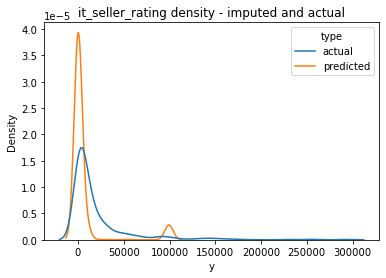

In [25]:
sns.kdeplot(data=X, x="y", hue="type")
plt.title('it_seller_rating density - imputed and actual')

plt.show()

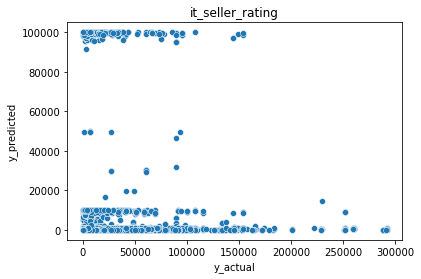

In [26]:
sns.scatterplot(x = y_actual, y = y_predicted)
plt.xlabel('y_actual')
plt.ylabel('y_predicted')
plt.title('it_seller_rating')

plt.show()

In [27]:
tab_one_column = []
for i in range(10):
    tab_one_column.append(insert_nans_and_impute_one_column(dfX, False))

tab_one_column = np.array(tab_one_column)

In [28]:
print(f'Średna wartość błędu średniokwadratowego wynosi: {tab_one_column.mean():.2f}, natomiast odchylenie standardowe: {tab_one_column.std():.2f}')

Średna wartość błędu średniokwadratowego wynosi: 3764.03, natomiast odchylenie standardowe: 114.39


### Dwie kolumny

In [29]:
def insert_nans_and_impute_two_columns(dfX, return_out_df):
    dfXX = dfX.copy()
    dfXX.loc[dfXX.sample(frac = 0.1).index, 'it_seller_rating'] = np.nan
    dfXX.loc[dfXX.sample(frac = 0.1).index, 'it_quantity'] = np.nan
    
    from sklearn.impute import KNNImputer
    
    imputer = KNNImputer(n_neighbors = 2, weights = "uniform")
    out = imputer.fit_transform(dfXX)
    
    from sklearn.metrics import mean_squared_error

    rms = mean_squared_error(dfX, out, squared=False)
    
    if not return_out_df:
        return rms
    else:
        vec = dfXX.it_seller_rating.isna()
        y_actual = dfX.loc[vec.to_numpy(), ['it_seller_rating', 'it_quantity']].to_numpy()
        y_predicted = out[vec, :]
        y_predicted = y_predicted[:, [1, 2]]
        
        return rms, y_actual, y_predicted

In [30]:
# pojedyncza próba

insert_nans_and_impute_two_columns(dfX, False)

7239.860062583196

In [48]:
# pojedyncza próba wraz z wynikami

rms, y_actual, y_predicted = insert_nans_and_impute_two_columns(dfX, True)

In [49]:
y_actual_df = pd.DataFrame(y_actual)
y_actual_df.columns = ['y1', 'y2']

y_actual_df['type'] = 'actual'

In [50]:
y_predicted_df = pd.DataFrame(y_predicted)
y_predicted_df.columns = ['y1', 'y2']

y_predicted_df['type'] = 'predicted'

In [51]:
X = pd.concat([y_actual_df, y_predicted_df])
X.columns = ['it_seller_rating', 'it_quantity', 'type']
X.head()

,it_seller_rating,it_quantity,type
0,5235.0,986.0,actual
1,16454.0,93.0,actual
2,6686.0,11.0,actual
3,10086.0,204.0,actual
4,144576.0,4023.0,actual


Porównanie rozkładów danych, które zostały usunięte oraz danych imputowanych

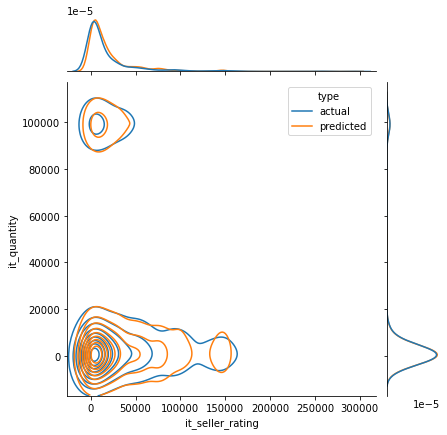

In [52]:
sns.jointplot(data = X, x = 'it_seller_rating', y = 'it_quantity', hue = 'type', kind = 'kde')

plt.show()

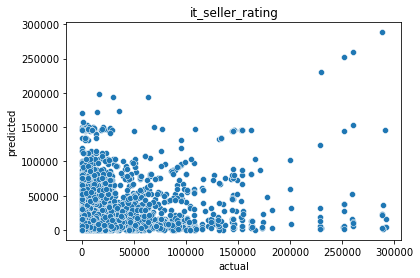

In [53]:
sns.scatterplot(x = X[X.type == 'actual'].it_seller_rating, y = X[X.type == 'predicted'].it_seller_rating)
plt.xlabel('actual')
plt.ylabel('predicted')
plt.title('it_seller_rating')

plt.show()

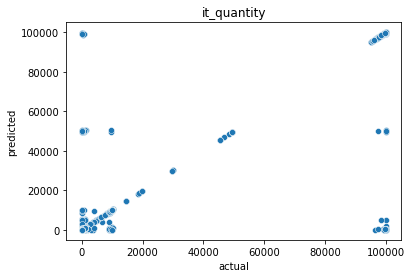

In [54]:
sns.scatterplot(x = X[X.type == 'actual'].it_quantity, y = X[X.type == 'predicted'].it_quantity)
plt.xlabel('actual')
plt.ylabel('predicted')
plt.title('it_quantity')

plt.show()

In [38]:
tab_two_columns = []
for i in range(10):
    tab_two_columns.append(insert_nans_and_impute_two_columns(dfX, False))

tab_two_columns = np.array(tab_two_columns)

In [39]:
print(f'Średna wartość błędu średniokwadratowego wynosi: {tab_two_columns.mean():.2f}, natomiast odchylenie standardowe: {tab_two_columns.std():.2f}')

Średna wartość błędu średniokwadratowego wynosi: 7274.69, natomiast odchylenie standardowe: 120.89


### Podsumowanie

Narzędzia do automatycznej imputacji są wygodne w użyciu, jednak w tym przypadku prowadzą do bardzo dużych błędów. 

W przypadku, gdy imputowałem tylko jedną kolumnę, rozkład zmiennej się zmienił. Dodatkowo, na scatterplocie, którego celem było porównanie prawdziwej oraz wyliczonej wartości zmiennych, w żaden sposób nie widać prostej. Algorytm nie przewidział również największych wartości.

W przypadku braku dwóch kolumn, błąd średniokwadratowy oraz odchylenie było jeszcze większe (odpowiednio około dwu- i trzykrotnie). Jednakże, wynikowe rozkłady wyglądają lepiej - są podobne do oryginalnych. Na scatterplocie porównującym kolumnę it_quantity widać nawet wyraźną linię prostą. Jeśli chodzi o it_seller_rating, przewidziane wartości rozłożone są bliżej swych prawdziwych wartości (nie tak jak w przpadku jednej kolumny).

In [40]:
tab_one_column_df = pd.DataFrame(tab_one_column)
tab_one_column_df.columns = ['val']
tab_one_column_df['type'] = 'one column'

tab_two_columns_df = pd.DataFrame(tab_two_columns)
tab_two_columns_df.columns = ['val']
tab_two_columns_df['type'] = 'two columns'

X = pd.concat([tab_one_column_df, tab_two_columns_df])
X.columns = ['val', 'type']
X.head()

,val,type
0,3772.238053,one column
1,3843.758217,one column
2,3863.794435,one column
3,3836.216641,one column
4,3672.162348,one column


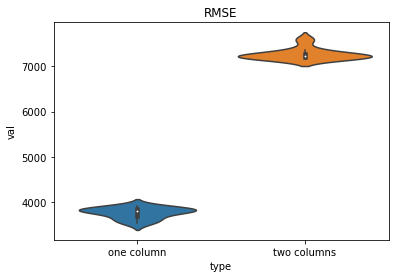

In [47]:
sns.violinplot(data = X, y = 'val', x = 'type')
plt.title('RMSE')

plt.show()

RMSE był liczony na całej imputowanej ramce, nie tylko jednej zmiennej - dlatego w przypadku dwóch kolumn błąd jest prawie dwa razy większy.